In [34]:
#importing functions
import csv
import random
import math
import operator
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [35]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]): #loads dataset and splits it into train and test
    with open(filename, 'r') as csvfile: #opens file with handle csvfile
        lines = csv.reader(csvfile) #load / read the contents of handle and store them in lines
        #print(lines) -- csvreader object
        dataset = list(lines) # convert string to list 
        #print(dataset)
        for x in range(len(dataset)-1): #for each ele in list
            for y in range(4): #
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
        #print(trainingSet)
        #print(testSet)
loadDataset('iris.csv', 0.67)

In [36]:
def euclideanDistance(instance1, instance2, length): #length --> length of test set
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    #print(distance)
    return math.sqrt(distance)

In [37]:
def getNeighbors(trainingSet, testInstance, k): #testInstance is each test-point in test-set
    distances = [] 
    length = len(testInstance)-1
    for x in range(len(trainingSet)): #for each y, iterate over all the x-instance
        dist = euclideanDistance(testInstance, trainingSet[x], length) 
        distances.append((trainingSet[x], dist)) 
        distances.sort(key=operator.itemgetter(1)) #in ascending --> smallest dist first
        neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0]) #here, append k neighbors having smallest distance 
    return neighbors

In [38]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1] 
        #print(response)
        if response in classVotes: #simple dict of key, key_counter
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #print(classVotes)
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    #print(sortedVotes)
    return sortedVotes[0][0] #returns first index of first ele..which is class label
        

In [39]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]: 
            correct += 1
    return (correct/float(len(testSet))) * 100.0 #no of corrects / total_len(test_set) * 100

For split_value - 0.1
Train set: 12
Test set: 137
For split_value - 0.3
Train set: 41
Test set: 108
For split_value - 0.6
Train set: 88
Test set: 61
For split_value - 0.8
Train set: 109
Test set: 40
defaultdict(<class 'dict'>, {0.1: {2: 94.8905109489051, 3: 91.97080291970804, 5: 57.66423357664233, 7: 55.47445255474452, 9: 47.44525547445255}, 0.3: {2: 89.81481481481481, 3: 91.66666666666666, 5: 91.66666666666666, 7: 91.66666666666666, 9: 92.5925925925926}, 0.6: {2: 98.36065573770492, 3: 96.72131147540983, 5: 96.72131147540983, 7: 95.08196721311475, 9: 95.08196721311475}, 0.8: {2: 90.0, 3: 92.5, 5: 95.0, 7: 97.5, 9: 97.5}})


,0.1,0.3,0.6,0.8
2,94.890511,89.814815,98.360656,90.0
3,91.970803,91.666667,96.721311,92.5
5,57.664234,91.666667,96.721311,95.0
7,55.474453,91.666667,95.081967,97.5
9,47.445255,92.592593,95.081967,97.5


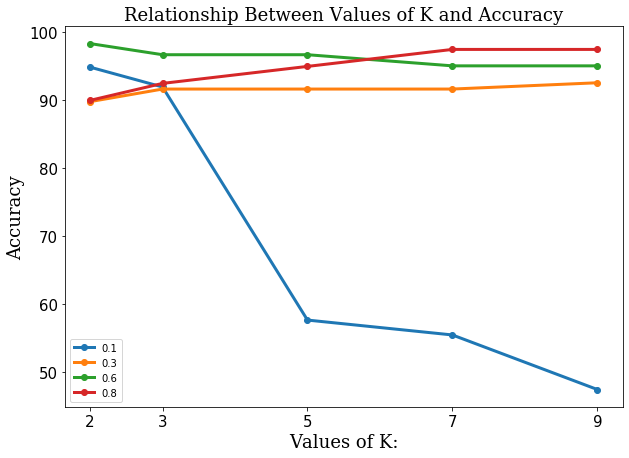

In [40]:
import matplotlib.pyplot as plt
from collections import defaultdict

def main():
    # prepare data
    split_array = [0.1, 0.3, 0.6, 0.8]
    
    #split = 0.67
    # generate predictions
    k_array = [2, 3, 5, 7, 9]
    final_accuracy = defaultdict(dict)
    #k = 2
    for _el in split_array:
        trainingSet, testSet=[], []
        split = _el
        print(f"For split_value - {split}")
        loadDataset('iris.csv', split, trainingSet, testSet)
        print('Train set: ' + repr(len(trainingSet)))
        print('Test set: ' + repr(len(testSet)))
        i = 0
        for ele in k_array:
            predictions, k = [], ele
            #print(f"k - {k}")
            for x in range(len(testSet)):
                neighbors = getNeighbors(trainingSet, testSet[x], k) #get k closest neighors
                result = getResponse(neighbors) #returns the predicted class
                predictions.append(result) #append the result to another array
                #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
            accuracy = getAccuracy(testSet, predictions)
            final_accuracy[split][k] = accuracy
            #print('Accuracy: ' + repr(accuracy) + '%')
    print(final_accuracy)
    resultant_df = pd.DataFrame(final_accuracy)
    display(resultant_df)
    fig, ax1 = plt.subplots()
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 18,
            }
    fig.set_size_inches(10, 7)
    ax1.set_xlabel('Values of K:', fontdict = font)
    ax1.set_ylabel('Accuracy', fontdict = font)
    ax1.set_title('Relationship Between Values of K and Accuracy', fontdict = font)
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax1.tick_params(axis='both', which='minor', labelsize=12)
    plt.plot(resultant_df, linewidth = 3, marker = 'o', markersize = 6)
    plt.xticks(k_array) 
    plt.legend(split_array, loc = 'lower left')
    plt.show()
    
    
main()

In [41]:
'''
def main():

	trainingSet=[]
	testSet=[]
	split = 0.9
	loadDataset('iris.csv', split, trainingSet, testSet)
	print('Train set: ' + repr(len(trainingSet)))
	print('Test set: ' + repr(len(testSet)))
	# generate predictions
	predictions=[]
	k = 2
	for x in range(len(testSet)):
		neighbors = getNeighbors(trainingSet, testSet[x], k)
		result = getResponse(neighbors)
		predictions.append(result)
		print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
	accuracy = getAccuracy(testSet, predictions)
	print('Accuracy: ' + repr(accuracy) + '%')
	
main()
'''

"\ndef main():\n\n\ttrainingSet=[]\n\ttestSet=[]\n\tsplit = 0.9\n\tloadDataset('iris.csv', split, trainingSet, testSet)\n\tprint('Train set: ' + repr(len(trainingSet)))\n\tprint('Test set: ' + repr(len(testSet)))\n\t# generate predictions\n\tpredictions=[]\n\tk = 2\n\tfor x in range(len(testSet)):\n\t\tneighbors = getNeighbors(trainingSet, testSet[x], k)\n\t\tresult = getResponse(neighbors)\n\t\tpredictions.append(result)\n\t\tprint('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))\n\taccuracy = getAccuracy(testSet, predictions)\n\tprint('Accuracy: ' + repr(accuracy) + '%')\n\t\nmain()\n"

In [42]:
#Question 2....
#First I will partition data into k partitions..
#next
'''
def partition(data, kFolds, seed = None):
    
    #assiging current part of dataset to non-full partition
    def assign_partitions(partitions, kFolds, size, seed = None):
        if seed is not None: #just blindly using the seed value --> intuition copied from exisiting code
            random.Random(seed)
        x = random.randint(0, kFolds - 1) #take a random fold from 0 to k
        while(len(partitions[x]) >= size):
            x = random.randint(0,kFolds - 1)
        return x

    #first lets find total size of dataset
    size = math.ceil(len(data) / float(kFolds)) # rounding off to ceil values
    partitions = [[] for i in range(kFolds)] #empty 2d array
    for element in data:
        x = assign_partitions(partitions, kFolds, size, seed) 
        partitions[x].append(element)
    return partitions

#reusing same code
def loadDataset_kfolded(filename, split, trainingSet=[] , testSet=[]): #loads dataset and splits it into train and test
    with open(filename, 'r') as csvfile: #opens file with handle csvfile
        lines = csv.reader(csvfile) #load / read the contents of handle and store them in lines
        #print(lines) -- csvreader object
        dataset = list(lines) # convert string to list 
        k = 5
        partitions = partition(dataset, k, 1)
        for i in range(k):
            trainingSet = list()
            for j in range(k):
                if j != i:
                    trainingSet.append(partitions[j])
            trainingSet = [item for entry in trainingSet for item in entry]
            testSet = partitions[i]
            print("###---- trainingset ----###")
            print(trainingSet)
            print("###---- testset ----###")
            print(testSet)
            print("---\n\n\n---")

loadDataset_kfolded('iris.csv', 0)
'''

'\ndef partition(data, kFolds, seed = None):\n    \n    #assiging current part of dataset to non-full partition\n    def assign_partitions(partitions, kFolds, size, seed = None):\n        if seed is not None: #just blindly using the seed value --> intuition copied from exisiting code\n            random.Random(seed)\n        x = random.randint(0, kFolds - 1) #take a random fold from 0 to k\n        while(len(partitions[x]) >= size):\n            x = random.randint(0,kFolds - 1)\n        return x\n\n    #first lets find total size of dataset\n    size = math.ceil(len(data) / float(kFolds)) # rounding off to ceil values\n    partitions = [[] for i in range(kFolds)] #empty 2d array\n    for element in data:\n        x = assign_partitions(partitions, kFolds, size, seed) \n        partitions[x].append(element)\n    return partitions\n\n#reusing same code\ndef loadDataset_kfolded(filename, split, trainingSet=[] , testSet=[]): #loads dataset and splits it into train and test\n    with open(fi

{2: 0.9375494071146246, 6: 0.9280632411067193, 10: 0.9454545454545455, 14: 0.9640316205533598, 18: 0.9545454545454547}


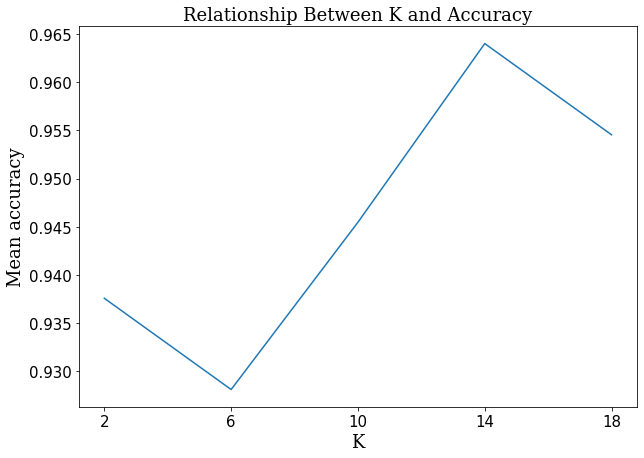

In [43]:
from sklearn.datasets import load_iris
#dframe = load_iris()
#X = dframe.data[:, :3]  # we only take the first two features.
#y = dframe.target

df = pd.read_csv('iris.csv')
X = df.iloc[:, 0:4]
y = df.iloc[:, [4]]
k_array = [2, 6, 10, 14, 18]
resultant_mean = dict()
for k in k_array:
    KNN = KNeighborsClassifier(n_neighbors = k)
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    kf = KFold(n_splits = 5, shuffle = False)
    cv_scores = cross_val_score(KNN, X_train, np.ravel(y_train), cv = kf)
    #print(cv_scores)
    #print(cv_scores.mean())
    resultant_mean[k] = cv_scores.mean()
print(resultant_mean)

fig, ax1 = plt.subplots()
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
fig.set_size_inches(10, 7)
ax1.set_xlabel('K', fontdict = font)
ax1.set_ylabel('Mean accuracy', fontdict = font)
ax1.set_title('Relationship Between K and Accuracy', fontdict = font)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='both', which='minor', labelsize=12)
plt.xticks(k_array)
plt.plot(*zip(*sorted(resultant_mean.items())))
plt.show()

------ Last letter ------
Cob is: female
John is: female
Barry is: female
Most Informative Features
             last_letter = 'a'            female : male   =     34.8 : 1.0
             last_letter = 'k'              male : female =     31.3 : 1.0
             last_letter = 'f'              male : female =     16.4 : 1.0
             last_letter = 'p'              male : female =     11.7 : 1.0
             last_letter = 'd'              male : female =      9.6 : 1.0
0.748
------ First 2 last 2 ------
Cob is: male
John is: male
Barry is: male
Most Informative Features
               last_word = 'na'           female : male   =    100.2 : 1.0
               last_word = 'la'           female : male   =     76.5 : 1.0
               last_word = 'ia'           female : male   =     56.4 : 1.0
               last_word = 'us'             male : female =     41.1 : 1.0
               last_word = 'sa'           female : male   =     36.7 : 1.0
0.81
------ Get from mid ------
Cob is: male
Jo

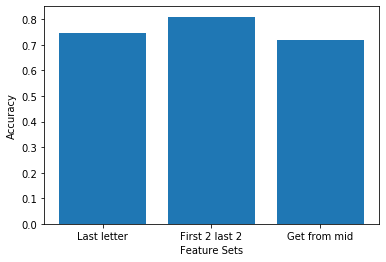

In [44]:
#question 2
import nltk
from nltk.corpus import names
import random

def gender_features(word):
    return {'last_letter': word[-1]}
# gender_features('Shrek') = {'last_letter': 'k'}

def get_from_mid(word):
    return {'from_mid_to_end' : word[len(word)//2 : len(word) - 1]}

def get_first2_last2(word):
    return {'first_word': word[0:1], 'last_word' : word[-2:]}

male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]
labeled_names = male_names + female_names
random.shuffle(labeled_names)
res_accuracy = []

print("------ Last letter ------")
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

ans1 = classifier.classify(get_first2_last2('Cob'))
ans2 = classifier.classify(get_first2_last2('John'))
ans3 = classifier.classify(get_first2_last2('Barry'))
print("Cob is:", ans1)
print("John is:", ans2)
print("Barry is:", ans3)
classifier.show_most_informative_features(5)
print(nltk.classify.accuracy(classifier, test_set))
res_accuracy.append(nltk.classify.accuracy(classifier, test_set))

print("------ First 2 last 2 ------")
featuresets_first2_last2 = [(get_first2_last2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets_first2_last2[500:], featuresets_first2_last2[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

ans1 = classifier.classify(get_first2_last2('Cob'))
ans2 = classifier.classify(get_first2_last2('John'))
ans3 = classifier.classify(get_first2_last2('Barry'))
print("Cob is:", ans1)
print("John is:", ans2)
print("Barry is:", ans3)

classifier.show_most_informative_features(5)
print(nltk.classify.accuracy(classifier, test_set))
res_accuracy.append(nltk.classify.accuracy(classifier, test_set))


print("------ Get from mid ------")
f_m = [(get_from_mid(n), gender) for (n, gender) in labeled_names]
train_set, test_set = f_m[500:], f_m[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

ans1 = classifier.classify(get_from_mid('Cob'))
ans2 = classifier.classify(get_from_mid('John'))
ans3 = classifier.classify(get_from_mid('Barry'))
print("Cob is:", ans1)
print("John is:", ans2)
print("Barry is:", ans3)

classifier.show_most_informative_features(5)
print(nltk.classify.accuracy(classifier, test_set))
res_accuracy.append(nltk.classify.accuracy(classifier, test_set))

fig, ax = plt.subplots() 
plt.bar([0, 1, 2], res_accuracy)
labels = ['Last letter', 'First 2 last 2', 'Get from mid']
plt.xticks([0, 1, 2], labels)
plt.ylabel('Accuracy')
plt.xlabel('Feature Sets')
plt.show()

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.

In [45]:
def plotSVC(title):
  # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)) 
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

Actual values --
8 9 0 1 2


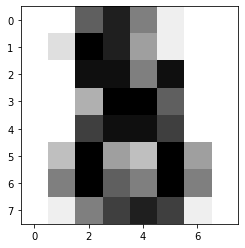

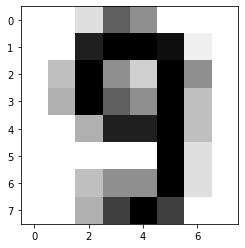

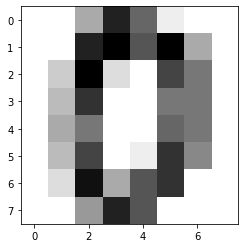

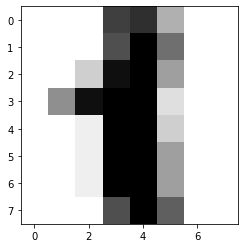

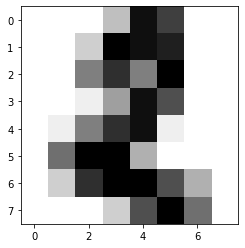

Gamma => 0.0001 || C => 0.01
Prediction: [3]
Prediction: [3]
Prediction: [3]
Prediction: [3]
Prediction: [3]
Gamma => 1 || C => 100
Prediction: [3]
Prediction: [9]
Prediction: [0]
Prediction: [1]
Prediction: [2]
Gamma => 50000 || C => 10000000000000000
Prediction: [3]
Prediction: [9]
Prediction: [0]
Prediction: [1]
Prediction: [2]


In [47]:
#Q3
from sklearn import datasets
from sklearn import svm

digits = datasets.load_digits()
x, y = digits.data[:-1], digits.target[:-1]


dim = [-1, -2, 0, 1, 2]
print("Actual values --")
print(8, 9, 0, 1, 2)
for e in dim:
    plt.imshow(digits.images[e], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

print("Gamma => 0.0001 || C => 0.01")
classifier = svm.SVC(gamma=0.0000001, C=0.00000001)
classifier.fit(x, y)
print('Prediction:', classifier.predict(digits.data[-1].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[-2].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[0].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[1].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[2].reshape(1, -1)))

print("Gamma => 1 || C => 100")
classifier = svm.SVC(gamma=1, C=100)
classifier.fit(x, y)
print('Prediction:', classifier.predict(digits.data[-1].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[-2].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[0].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[1].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[2].reshape(1, -1)))

print("Gamma => 50000 || C => 10000000000000000")
classifier = svm.SVC(gamma=50000, C=10000000000000000)
classifier.fit(x, y)
print('Prediction:', classifier.predict(digits.data[-1].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[-2].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[0].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[1].reshape(1, -1)))
print('Prediction:', classifier.predict(digits.data[2].reshape(1, -1)))